In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_auc_score as ras, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.1-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 109.5 kB/s eta 0:15:11
   ---------------------------------------- 0.0/99.7 MB 109.5 kB/s eta 0:15:11
   ---------------------------------------- 0.0/99.7 MB 122.9 kB/s eta 0:13:32
   ---------------------------------------- 0.0/99.7 MB 122.9 kB/s eta 0:13:32
   ---------------------------------------- 0.0/99.7 MB 122.9 kB/s eta 0:13:32
   ---------------------------------------- 0.0/9

   -------------------------- ------------- 66.4/99.7 MB 1.5 MB/s eta 0:00:23
   -------------------------- ------------- 66.4/99.7 MB 1.5 MB/s eta 0:00:23
   -------------------------- ------------- 66.4/99.7 MB 1.5 MB/s eta 0:00:23
   -------------------------- ------------- 66.4/99.7 MB 1.5 MB/s eta 0:00:23
   -------------------------- ------------- 66.4/99.7 MB 1.5 MB/s eta 0:00:23
   -------------------------- ------------- 66.4/99.7 MB 1.5 MB/s eta 0:00:23
   -------------------------- ------------- 66.4/99.7 MB 1.5 MB/s eta 0:00:23
   -------------------------- ------------- 66.4/99.7 MB 1.5 MB/s eta 0:00:23
   -------------------------- ------------- 66.4/99.7 MB 1.5 MB/s eta 0:00:23
   -------------------------- ------------- 66.5/99.7 MB 1.3 MB/s eta 0:00:25
   -------------------------- ------------- 66.7/99.7 MB 1.3 MB/s eta 0:00:25
   -------------------------- ------------- 67.0/99.7 MB 1.3 MB/s eta 0:00:25
   -------------------------- ------------- 67.2/99.7 MB 1.3 MB/

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
train_df=pd.read_parquet("C:\\Users\\maniv\\Downloads\\Structured_Data_Assignment\\Structured_Data_Assignment\\train.parquet")

In [6]:
print("Data set size : ", train_df.shape)

Data set size :  (3220868, 3)


In [7]:
train_df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [8]:
train_df.tail()

,Patient-Uid,Date,Incident
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6
29080911,a0ee146e-1c7c-11ec-baee-16262ee38c7f,2018-10-05,DRUG_TYPE_1


In [9]:
train_df.columns

Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')

In [10]:
train_df.describe()

,Date
count,3220868
mean,2018-02-24 18:27:44.495410944
min,2015-04-07 00:00:00
25%,2016-11-30 00:00:00
50%,2018-04-11 00:00:00
75%,2019-05-30 00:00:00
max,2020-09-03 00:00:00


In [11]:
train_df.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [12]:
train_df.duplicated().sum()

35571

In [13]:
train_df = train_df.drop_duplicates()

In [14]:
train_df.duplicated().sum()

0

In [15]:
train_df.dtypes

Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [16]:
print("Unique values of Incident \n")
print(train_df['Incident'].unique())

Unique values of Incident 

['PRIMARY_DIAGNOSIS' 'SYMPTOM_TYPE_0' 'DRUG_TYPE_0' 'DRUG_TYPE_1'
 'DRUG_TYPE_2' 'TEST_TYPE_0' 'DRUG_TYPE_3' 'DRUG_TYPE_4' 'DRUG_TYPE_5'
 'DRUG_TYPE_6' 'DRUG_TYPE_8' 'DRUG_TYPE_7' 'SYMPTOM_TYPE_1' 'DRUG_TYPE_10'
 'SYMPTOM_TYPE_29' 'SYMPTOM_TYPE_2' 'DRUG_TYPE_11' 'DRUG_TYPE_9'
 'DRUG_TYPE_13' 'SYMPTOM_TYPE_5' 'TEST_TYPE_1' 'SYMPTOM_TYPE_6'
 'TEST_TYPE_2' 'SYMPTOM_TYPE_3' 'SYMPTOM_TYPE_8' 'DRUG_TYPE_14'
 'DRUG_TYPE_12' 'SYMPTOM_TYPE_9' 'SYMPTOM_TYPE_10' 'SYMPTOM_TYPE_7'
 'SYMPTOM_TYPE_11' 'TEST_TYPE_3' 'DRUG_TYPE_15' 'SYMPTOM_TYPE_4'
 'SYMPTOM_TYPE_14' 'SYMPTOM_TYPE_13' 'SYMPTOM_TYPE_16' 'SYMPTOM_TYPE_17'
 'SYMPTOM_TYPE_15' 'SYMPTOM_TYPE_18' 'SYMPTOM_TYPE_12' 'SYMPTOM_TYPE_20'
 'SYMPTOM_TYPE_21' 'DRUG_TYPE_17' 'SYMPTOM_TYPE_22' 'TEST_TYPE_4'
 'SYMPTOM_TYPE_23' 'DRUG_TYPE_16' 'TEST_TYPE_5' 'SYMPTOM_TYPE_19'
 'SYMPTOM_TYPE_24' 'SYMPTOM_TYPE_25' 'SYMPTOM_TYPE_26' 'SYMPTOM_TYPE_27'
 'DRUG_TYPE_18' 'SYMPTOM_TYPE_28' 'TARGET DRUG']


In [17]:
train_df.Incident.value_counts()

Incident
DRUG_TYPE_6          549616
DRUG_TYPE_1          484565
PRIMARY_DIAGNOSIS    424879
DRUG_TYPE_0          298881
DRUG_TYPE_2          256203
DRUG_TYPE_7          251239
DRUG_TYPE_8          158706
DRUG_TYPE_3          126615
TEST_TYPE_1           96810
TARGET DRUG           67218
DRUG_TYPE_9           66894
DRUG_TYPE_5           55940
SYMPTOM_TYPE_0        46078
DRUG_TYPE_11          45419
SYMPTOM_TYPE_6        32066
TEST_TYPE_0           27570
SYMPTOM_TYPE_7        22019
DRUG_TYPE_10          20911
DRUG_TYPE_14          17306
DRUG_TYPE_13          12321
DRUG_TYPE_12           9540
SYMPTOM_TYPE_14        8927
SYMPTOM_TYPE_1         8608
SYMPTOM_TYPE_2         8168
TEST_TYPE_3            8115
SYMPTOM_TYPE_5         7583
SYMPTOM_TYPE_8         7430
TEST_TYPE_2            7021
SYMPTOM_TYPE_15        6295
SYMPTOM_TYPE_10        6005
SYMPTOM_TYPE_29        5910
SYMPTOM_TYPE_16        4940
DRUG_TYPE_15           4906
SYMPTOM_TYPE_9         4885
DRUG_TYPE_4            4566
SYMPTOM_TYP

In [18]:
train_df.Date.value_counts()

Date
2019-05-21    3645
2019-05-22    3330
2019-03-05    3156
2019-05-14    3134
2019-03-12    2986
              ... 
2017-01-27     308
2017-02-28     285
2020-02-29     282
2016-01-29     271
2016-02-29     255
Name: count, Length: 1977, dtype: int64

In [19]:
positive_df = train_df[train_df['Incident']=='TARGET DRUG']
positive_df.head()

,Patient-Uid,Date,Incident
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG


In [20]:
positive_df.shape

(67218, 3)

In [21]:
negative =  train_df[~train_df['Patient-Uid'].isin(positive_df['Patient-Uid'])]
negative_df = negative.groupby('Patient-Uid').tail(1)
negative_df

,Patient-Uid,Date,Incident
1560892,a0e3a8c0-1c7c-11ec-98c2-16262ee38c7f,2018-05-06,PRIMARY_DIAGNOSIS
1620903,a0dd6a3f-1c7c-11ec-9b86-16262ee38c7f,2015-04-07,SYMPTOM_TYPE_0
1629044,a0e48a75-1c7c-11ec-8c5f-16262ee38c7f,2018-08-22,DRUG_TYPE_6
1942882,a0e3cf61-1c7c-11ec-8098-16262ee38c7f,2018-08-21,DRUG_TYPE_2
1975541,a0e91a8c-1c7c-11ec-acc2-16262ee38c7f,2020-04-15,PRIMARY_DIAGNOSIS
...,...,...,...
3256795,a0e045a1-1c7c-11ec-8014-16262ee38c7f,2020-07-10,PRIMARY_DIAGNOSIS
3256799,a0e67e2a-1c7c-11ec-b805-16262ee38c7f,2015-12-16,PRIMARY_DIAGNOSIS
3256800,a0dec400-1c7c-11ec-80df-16262ee38c7f,2019-08-06,PRIMARY_DIAGNOSIS
3256804,a0e09919-1c7c-11ec-9e7d-16262ee38c7f,2017-02-19,DRUG_TYPE_6


In [22]:
negative_df.shape

(17659, 3)

In [23]:
positive_df['Prescription_Count'] = positive_df.groupby('Patient-Uid')['Date'].cumcount()
negative_df['Prescription_Count'] = negative_df.groupby('Patient-Uid')['Date'].cumcount()
positive_df.tail(5)

,Patient-Uid,Date,Incident,Prescription_Count
29074998,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG,4
29075105,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG,9
29075494,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG,10
29080031,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG,14
29080178,a0eef180-1c7c-11ec-8de8-16262ee38c7f,2018-07-17,TARGET DRUG,13


In [24]:
negative_df.tail()

,Patient-Uid,Date,Incident,Prescription_Count
3256795,a0e045a1-1c7c-11ec-8014-16262ee38c7f,2020-07-10,PRIMARY_DIAGNOSIS,0
3256799,a0e67e2a-1c7c-11ec-b805-16262ee38c7f,2015-12-16,PRIMARY_DIAGNOSIS,0
3256800,a0dec400-1c7c-11ec-80df-16262ee38c7f,2019-08-06,PRIMARY_DIAGNOSIS,0
3256804,a0e09919-1c7c-11ec-9e7d-16262ee38c7f,2017-02-19,DRUG_TYPE_6,0
3256805,a0e69331-1c7c-11ec-a98d-16262ee38c7f,2015-10-03,DRUG_TYPE_6,0


In [25]:
prediction_date = pd.to_datetime('today') + pd.DateOffset(days=30)
positive_df['Time_diff'] = (prediction_date - positive_df.groupby('Patient-Uid')['Date'].transform('max')).dt.days
negative_df['Time_diff'] = (prediction_date - negative_df.groupby('Patient-Uid')['Date'].transform('max')).dt.days

In [26]:
positive_df.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG,0,1200
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG,0,1454
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG,0,1479
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG,0,1184
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG,0,1200


In [27]:
negative_df.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff
1560892,a0e3a8c0-1c7c-11ec-98c2-16262ee38c7f,2018-05-06,PRIMARY_DIAGNOSIS,0,2030
1620903,a0dd6a3f-1c7c-11ec-9b86-16262ee38c7f,2015-04-07,SYMPTOM_TYPE_0,0,3155
1629044,a0e48a75-1c7c-11ec-8c5f-16262ee38c7f,2018-08-22,DRUG_TYPE_6,0,1922
1942882,a0e3cf61-1c7c-11ec-8098-16262ee38c7f,2018-08-21,DRUG_TYPE_2,0,1923
1975541,a0e91a8c-1c7c-11ec-acc2-16262ee38c7f,2020-04-15,PRIMARY_DIAGNOSIS,0,1320


In [28]:
new_df = pd.concat([positive_df, negative_df])
new_df.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG,0,1200
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG,0,1454
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG,0,1479
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG,0,1184
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG,0,1200


In [29]:
new_df.shape

(84877, 5)

In [30]:
X_train,X_test,y_train,y_test = X_train, X_test, y_train, y_test = train_test_split(new_df[['Prescription_Count', 'Time_diff']], new_df['Incident'] == 'TARGET DRUG', test_size = 0.25, random_state=42)


In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((63657, 2), (21220, 2), (63657,), (21220,))

In [32]:
xgb_classifier =  XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [33]:
y_pred = xgb_classifier.predict(X_test)

In [34]:
conf_matrix_report = confusion_matrix(y_test, y_pred)
conf_matrix_report

array([[ 4015,   377],
       [  895, 15933]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.82      0.91      0.86      4392
        True       0.98      0.95      0.96     16828

    accuracy                           0.94     21220
   macro avg       0.90      0.93      0.91     21220
weighted avg       0.94      0.94      0.94     21220



In [36]:
F1_score = f1_score(y_test, y_pred)
F1_score

0.9616150642766613

In [37]:
accuracy_score(y_test, y_pred)

0.9400565504241282

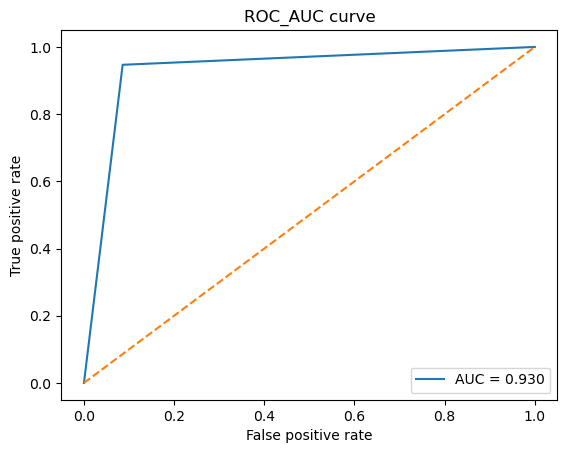

In [38]:
fpr,tpr, thresold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr, label = 'AUC = %0.3f' % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.title('ROC_AUC curve')
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [40]:
test_df = pd.read_parquet("C:\\Users\\maniv\\Downloads\\Structured_Data_Assignment\\Structured_Data_Assignment\\test.parquet")

In [41]:
print("Data set size : ", test_df.shape)

Data set size :  (1065524, 3)


In [42]:
test_df.head()

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0


In [43]:
test_df.tail()

,Patient-Uid,Date,Incident
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8
1372859,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-19,DRUG_TYPE_7


In [44]:
test_df.columns

Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')

In [45]:
test_df.describe()

,Date
count,1065524
mean,2017-09-01 15:54:13.488799488
min,2015-04-07 00:00:00
25%,2016-07-26 00:00:00
50%,2017-09-11 00:00:00
75%,2018-09-26 00:00:00
max,2020-08-04 00:00:00


In [46]:
test_df.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [47]:
test_df.duplicated().sum()

12100

In [48]:
test_df = test_df.drop_duplicates()

In [49]:
test_df.duplicated().sum()

0

In [50]:
test_df.dtypes

Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [51]:
print("Unique values of Incident \n")
print(test_df['Incident'].unique())

Unique values of Incident 

['SYMPTOM_TYPE_0' 'DRUG_TYPE_0' 'DRUG_TYPE_2' 'DRUG_TYPE_1'
 'PRIMARY_DIAGNOSIS' 'DRUG_TYPE_8' 'TEST_TYPE_0' 'DRUG_TYPE_7'
 'DRUG_TYPE_11' 'SYMPTOM_TYPE_6' 'DRUG_TYPE_5' 'DRUG_TYPE_6' 'DRUG_TYPE_9'
 'DRUG_TYPE_15' 'TEST_TYPE_3' 'SYMPTOM_TYPE_3' 'TEST_TYPE_1' 'DRUG_TYPE_3'
 'TEST_TYPE_2' 'SYMPTOM_TYPE_7' 'DRUG_TYPE_12' 'SYMPTOM_TYPE_2'
 'SYMPTOM_TYPE_10' 'SYMPTOM_TYPE_1' 'SYMPTOM_TYPE_17' 'SYMPTOM_TYPE_18'
 'SYMPTOM_TYPE_5' 'SYMPTOM_TYPE_15' 'SYMPTOM_TYPE_9' 'SYMPTOM_TYPE_4'
 'SYMPTOM_TYPE_8' 'SYMPTOM_TYPE_29' 'DRUG_TYPE_13' 'SYMPTOM_TYPE_21'
 'DRUG_TYPE_4' 'SYMPTOM_TYPE_12' 'SYMPTOM_TYPE_11' 'SYMPTOM_TYPE_19'
 'DRUG_TYPE_14' 'SYMPTOM_TYPE_16' 'TEST_TYPE_4' 'DRUG_TYPE_10'
 'SYMPTOM_TYPE_26' 'SYMPTOM_TYPE_14' 'SYMPTOM_TYPE_24' 'DRUG_TYPE_16'
 'SYMPTOM_TYPE_13' 'TEST_TYPE_5' 'SYMPTOM_TYPE_20' 'SYMPTOM_TYPE_25'
 'SYMPTOM_TYPE_22' 'DRUG_TYPE_17' 'SYMPTOM_TYPE_27' 'SYMPTOM_TYPE_23'
 'SYMPTOM_TYPE_28']


In [52]:
test_df.Incident.value_counts()

Incident
DRUG_TYPE_6          188401
DRUG_TYPE_1          169089
PRIMARY_DIAGNOSIS    127996
DRUG_TYPE_0           90711
DRUG_TYPE_2           90465
DRUG_TYPE_7           90423
DRUG_TYPE_8           55696
DRUG_TYPE_3           40679
TEST_TYPE_1           34274
DRUG_TYPE_9           25294
DRUG_TYPE_5           20045
SYMPTOM_TYPE_0        17292
DRUG_TYPE_11          16587
SYMPTOM_TYPE_6        11536
TEST_TYPE_0           10921
SYMPTOM_TYPE_7         7943
SYMPTOM_TYPE_5         5403
DRUG_TYPE_14           4963
DRUG_TYPE_10           4242
DRUG_TYPE_13           4059
SYMPTOM_TYPE_1         2955
DRUG_TYPE_12           2823
SYMPTOM_TYPE_2         2772
TEST_TYPE_3            2709
SYMPTOM_TYPE_8         2683
TEST_TYPE_2            2524
SYMPTOM_TYPE_14        2482
DRUG_TYPE_4            1840
SYMPTOM_TYPE_15        1818
SYMPTOM_TYPE_10        1783
SYMPTOM_TYPE_29        1697
SYMPTOM_TYPE_9         1689
SYMPTOM_TYPE_16        1576
DRUG_TYPE_15           1373
SYMPTOM_TYPE_4         1315
SYMPTOM_TYP

In [53]:
positive_df = test_df[test_df['Incident']=='TARGET DRUG']
positive_df.head()


,Patient-Uid,Date,Incident


In [54]:
positive_df.shape

(0, 3)

In [55]:
negative =  test_df[~test_df['Patient-Uid'].isin(positive_df['Patient-Uid'])]
negative_df = negative.groupby('Patient-Uid').tail(1)
negative_df

,Patient-Uid,Date,Incident
57,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,TEST_TYPE_0
208,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2016-06-22,DRUG_TYPE_9
305,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,2019-07-21,DRUG_TYPE_6
420,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2016-06-15,DRUG_TYPE_6
497,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,2018-11-22,DRUG_TYPE_6
...,...,...,...
1372381,a102720c-1c7c-11ec-bd9a-16262ee38c7f,2020-01-07,DRUG_TYPE_6
1372432,a102723c-1c7c-11ec-9f80-16262ee38c7f,2019-07-06,DRUG_TYPE_3
1372543,a102726b-1c7c-11ec-bfbf-16262ee38c7f,2018-12-31,DRUG_TYPE_0
1372607,a102729b-1c7c-11ec-86ba-16262ee38c7f,2019-04-02,DRUG_TYPE_3


In [56]:
negative_df.shape

(11482, 3)

In [57]:
positive_df['Prescription_Count'] = positive_df.groupby('Patient-Uid')['Date'].cumcount()
negative_df['Prescription_Count'] = negative_df.groupby('Patient-Uid')['Date'].cumcount()
positive_df.tail(5)

,Patient-Uid,Date,Incident,Prescription_Count


In [58]:
negative_df.tail()

,Patient-Uid,Date,Incident,Prescription_Count
1372381,a102720c-1c7c-11ec-bd9a-16262ee38c7f,2020-01-07,DRUG_TYPE_6,0
1372432,a102723c-1c7c-11ec-9f80-16262ee38c7f,2019-07-06,DRUG_TYPE_3,0
1372543,a102726b-1c7c-11ec-bfbf-16262ee38c7f,2018-12-31,DRUG_TYPE_0,0
1372607,a102729b-1c7c-11ec-86ba-16262ee38c7f,2019-04-02,DRUG_TYPE_3,0
1372859,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-19,DRUG_TYPE_7,0


In [59]:
prediction_date = pd.to_datetime('today') + pd.DateOffset(days=30)
positive_df['Time_diff'] = (prediction_date - positive_df.groupby('Patient-Uid')['Date'].transform('max')).dt.days
negative_df['Time_diff'] = (prediction_date - negative_df.groupby('Patient-Uid')['Date'].transform('max')).dt.days

In [60]:
positive_df.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff


In [61]:
negative_df.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff
57,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,TEST_TYPE_0,0,2186
208,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2016-06-22,DRUG_TYPE_9,0,2713
305,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,2019-07-21,DRUG_TYPE_6,0,1589
420,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2016-06-15,DRUG_TYPE_6,0,2720
497,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,2018-11-22,DRUG_TYPE_6,0,1830


In [62]:
new_df = pd.concat([positive_df, negative_df])
new_df.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff
57,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,TEST_TYPE_0,0,2186
208,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2016-06-22,DRUG_TYPE_9,0,2713
305,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,2019-07-21,DRUG_TYPE_6,0,1589
420,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2016-06-15,DRUG_TYPE_6,0,2720
497,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,2018-11-22,DRUG_TYPE_6,0,1830


In [63]:
new_df.shape

(11482, 5)

In [64]:
train_df.drop_duplicates(inplace = True)

In [65]:
test_df['Prescription_Count'] = test_df.groupby('Patient-Uid')['Date'].cumcount()
test_df['Time_Difference'] = (prediction_date - test_df.groupby('Patient-Uid')['Date'].transform(max)).dt.days

In [69]:
# Rename 'Time_Difference' column to 'Time_diff'
test_df.rename(columns={'Time_Difference': 'Time_diff'}, inplace=True)

# Now you can make predictions with the XGBoost model
test_data_pred = xgb_classifier.predict(test_df[['Prescription_Count', 'Time_diff']])


In [70]:
test_data_pred

array([0, 1, 1, ..., 1, 1, 1])

In [71]:
Final_submission = pd.DataFrame({'Patient-Uid': test_df['Patient-Uid'], 'Prediction': test_data_pred})
Final_submission.head()

,Patient-Uid,Prediction
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1


In [72]:
Final_submission.to_csv('Final_submission.csv', index = False)